In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

%matplotlib inline

In [87]:

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
n_known_data = 100
X = 0.8 * np.random.randn(n_known_data, 2)
X_train = np.r_[X + 2, X - 2]

n_novelty_data = 10
# Generate some regular novel observations
X = 0.3 * np.random.randn(n_novelty_data, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(n_novelty_data, 2))



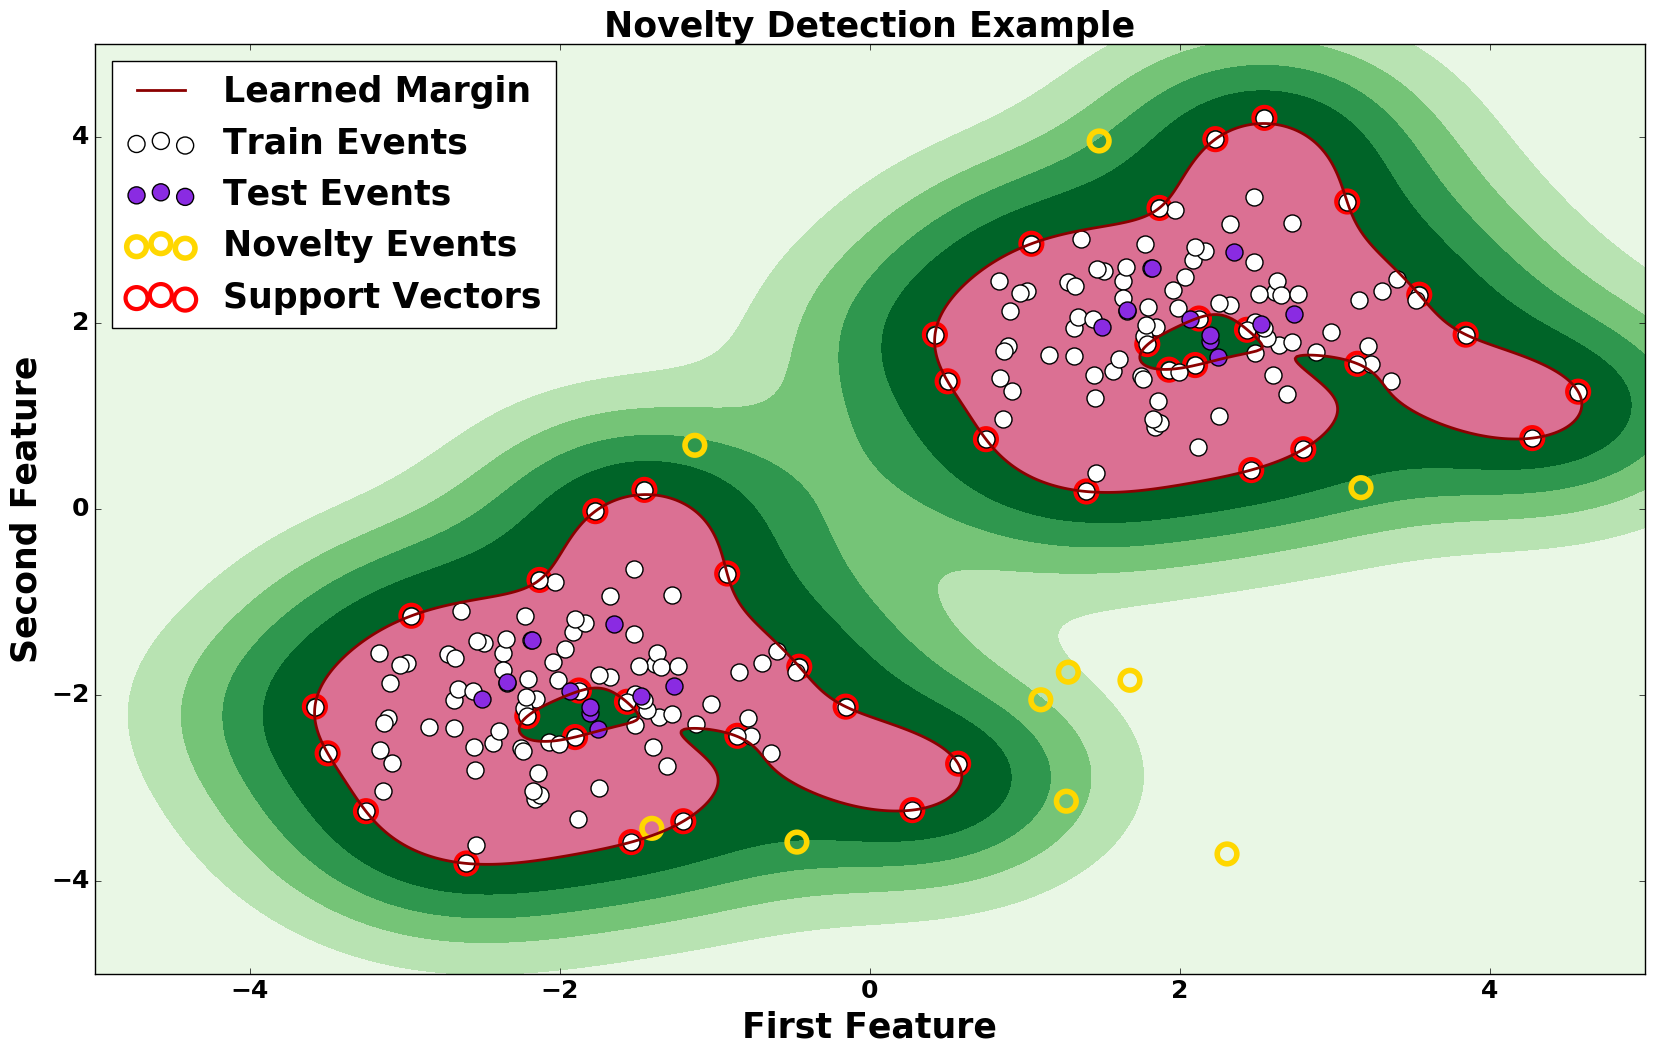

In [127]:
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# fit the model
nu_value = 0.1

clf = svm.OneClassSVM(nu=nu_value, kernel="rbf", gamma=0.9)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=[20,12])

plt.title("Novelty Detection Example",fontsize=25, fontweight='bold')

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 6), cmap=plt.cm.Greens)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 150
sv = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                 marker='o',s=250, facecolors='none',edgecolors='r',linewidth=3)


b1 = plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], marker='o', s=200, facecolors='none',edgecolors='gold', linewidth=4)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c, sv],
           ["Learned Margin", "Train Events",
            "Test Events", "Novelty Events","Support Vectors"],
           loc="upper left",fontsize=25)

plt.xlabel("First Feature",fontsize=25, fontweight='bold')
plt.ylabel("Second Feature",fontsize=25, fontweight='bold')

plt.show()
fig.savefig('/home/natmourajr/Workspace/Doutorado/SonarAnalysis/Results/NoveltyDetection/novelty_example_%1.3f_nu.pdf'%(nu_value))


In [32]:
clf.support_vectors_

array([[ 1.48588943,  2.28056379],
       [ 2.88533514,  1.96693345],
       [ 2.23356703,  2.68922829],
       [-2.59648569, -2.1549516 ],
       [-1.11466486, -2.03306655]])